In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from utils.ShipDataset import get_ship_dataset, load_image

import torch.optim as optim
from utils.Training import TrainingHelper, PlotReporter, ConsoleReporter

In [2]:
train_batch = 32
valid_batch = 64

train_dataset, valid_dataset = get_ship_dataset("./dataset/class", 10000, validation=0.1)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=train_batch, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=valid_batch, shuffle=False)

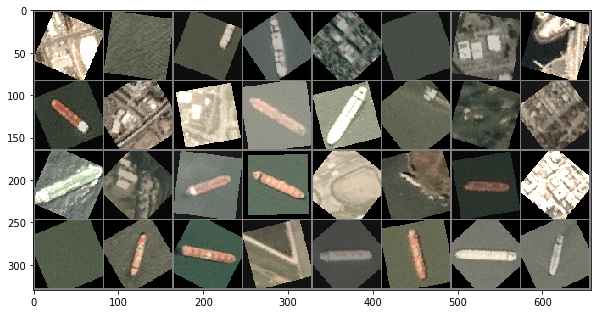

In [3]:
# Try to show some training images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training images
data_iter = iter(train_loader)
images, lables = data_iter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
# Fully connected network with a 100-neuron hidden layer
import torch.nn as nn
import torch.nn.functional as F

class FCNet(nn.Module):
    def __init__(self, ILayer, HLayer1, HLayer2, OLayer):
       super(FCNet, self).__init__()
       self.layer1 = torch.nn.Linear(ILayer, HLayer1)
       self.layer2 = torch.nn.Linear(HLayer1, HLayer2)
       self.layer3 = torch.nn.Linear(HLayer2, OLayer)
    
    def forward(self, x):
      #print(x.shape)
      x = x.view(x.size(0), -1)
      #print(x.shape)
      x = F.relu(self.layer1(x))
      x = F.relu(self.layer2(x))
      x = torch.sigmoid(self.layer3(x))
      return x.view(-1, 1)      
# a fc network with 100 hidden neurons
net = FCNet(3*80*80, 100, 10, 1)

In [ ]:
# Numper of parameters
sum([p.numel() for p in net.parameters()])

In [ ]:
training = TrainingHelper(net, nn.BCELoss(), optim.Adam(net.parameters(), lr=0.001))
training.reporter = PlotReporter(figsize=(15,5))

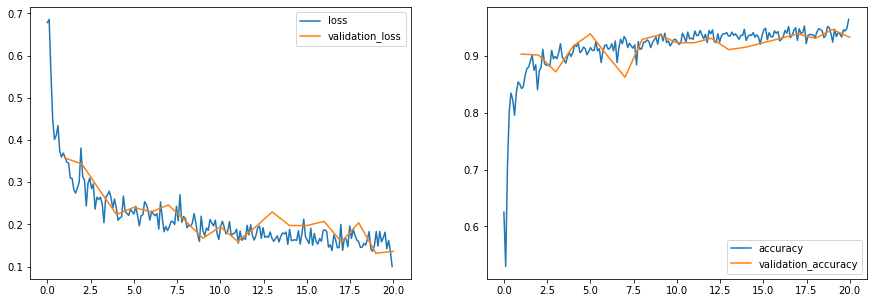

In [14]:
n_gen = 20
training.fit(n_gen,train_loader,valid_loader)

In [15]:
# calculate mean accuracy and loss of the last n validation epochs
n = 10
print("Acc: ", np.mean(training.reporter.val_acc[-n:]))
print("Loss:", np.mean(training.reporter.val_loss[-n:]))

Acc:  0.9288194444444444
Loss: 0.18134186193346977


Scale images down to 40*40

In [19]:
# Scale images down to 40*40
train_dataset, valid_dataset = get_ship_dataset("./dataset/class", 10000, validation=0.1, resize=(40,40))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=train_batch, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=valid_batch, shuffle=False)

In [20]:
# Fully connected network with 100 hidden neuron
import torch.nn as nn
import torch.nn.functional as F

class FCNet(nn.Module):
    def __init__(self, ILayer, HLayer, OLayer):
       super(FCNet, self).__init__()
       self.layer1 = torch.nn.Linear(ILayer, HLayer)
       self.layer2 = torch.nn.Linear(HLayer, OLayer)
    
    def forward(self, x):
      #print(x.shape)
      x = x.view(x.size(0), -1)
      #print(x.shape)
      x = F.relu(self.layer1(x))
      
      x = torch.sigmoid(self.layer2(x))
      return x.view(-1, 1)      
# a fc network with 100 hidden neurons
net = FCNet(3*40*40, 100, 1)


torch.Size([32, 3, 40, 40]) torch.Size([32, 1])


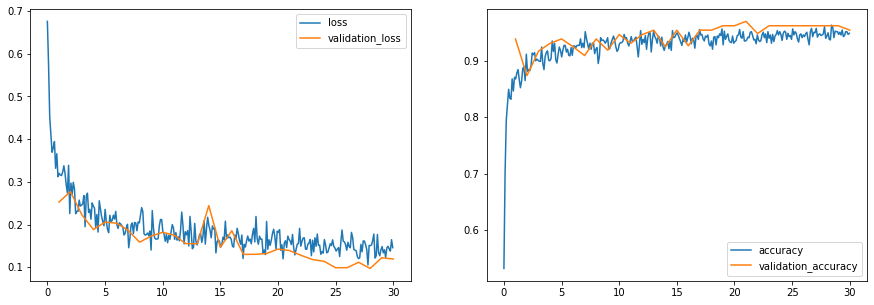

In [21]:
training = TrainingHelper(net, nn.BCELoss(), optim.Adam(net.parameters(), lr=0.001))
training.reporter = PlotReporter(figsize=(15,5))

n_gen = 30
training.fit(n_gen,train_loader,valid_loader)

In [22]:
# calculate mean accuracy and loss of the last n validation epochs
n = 10
print("Acc: ", np.mean(training.reporter.val_acc[-n:]))
print("Loss:", np.mean(training.reporter.val_loss[-n:]))

Acc:  0.9612847222222222
Loss: 0.11470982767641544


Scale images down to 20*20

In [25]:
train_dataset, valid_dataset = get_ship_dataset("./dataset/class", 10000, validation=0.1, resize=(20,20))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=train_batch, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=valid_batch, shuffle=False)

In [26]:
# Fully connected network with 100 hidden heuron
import torch.nn as nn
import torch.nn.functional as F

class FCNet(nn.Module):
    def __init__(self, ILayer, HLayer, OLayer):
       super(FCNet, self).__init__()
       self.layer1 = torch.nn.Linear(ILayer, HLayer)
       self.layer2 = torch.nn.Linear(HLayer, OLayer)
    
    def forward(self, x):
      #print(x.shape)
      x = x.view(x.size(0), -1)
      #print(x.shape)
      x = F.relu(self.layer1(x))
      
      x = torch.sigmoid(self.layer2(x))
      return x.view(-1, 1)      
# a fc network with 100 hidden neurons
net = FCNet(3*20*20, 100, 1)

# Test the forward pass of the network
inputs, lables = next(iter(train_loader))
x = net.forward(inputs)
print(inputs.shape, x.shape)

torch.Size([32, 3, 20, 20]) torch.Size([32, 1])


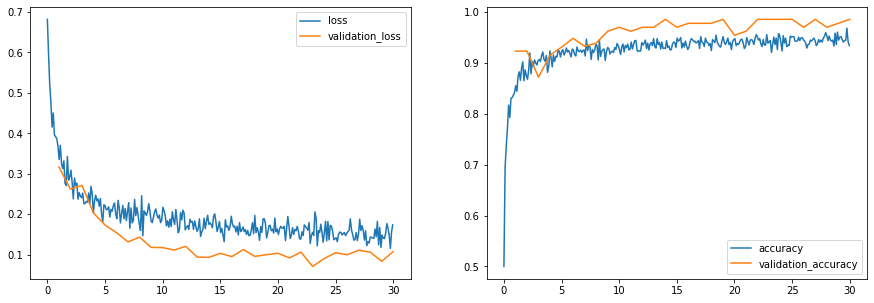

In [27]:
training = TrainingHelper(net, nn.BCELoss(), optim.Adam(net.parameters(), lr=0.001))
training.reporter = PlotReporter(figsize=(15,5))

n_gen = 30
training.fit(n_gen,train_loader,valid_loader)

In [28]:
# calculate mean accuracy and loss of the last n validation epochs
n = 10
print("Acc: ", np.mean(training.reporter.val_acc[-n:]))
print("Loss:", np.mean(training.reporter.val_loss[-n:]))

Acc:  0.9798611111111111
Loss: 0.09737174157053233


Fully connected network with 100 hidden heuron

In [4]:
train_batch = 32
valid_batch = 64

train_dataset, valid_dataset = get_ship_dataset("./dataset/class", 10000, validation=0.1)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=train_batch, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=valid_batch, shuffle=False)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class FCNet(nn.Module):
    def __init__(self, ILayer, HLayer, OLayer):
       super(FCNet, self).__init__()
       self.layer1 = torch.nn.Linear(ILayer, HLayer)
       self.layer2 = torch.nn.Linear(HLayer, OLayer)
    
    def forward(self, x):
      #print(x.shape)
      x = x.view(x.size(0), -1)
      #print(x.shape)
      x = F.relu(self.layer1(x))
      
      x = torch.sigmoid(self.layer2(x))
      return x.view(-1, 1)      
# a fc network with 100 hidden neurons
net = FCNet(3*80*80, 100, 1)


In [6]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

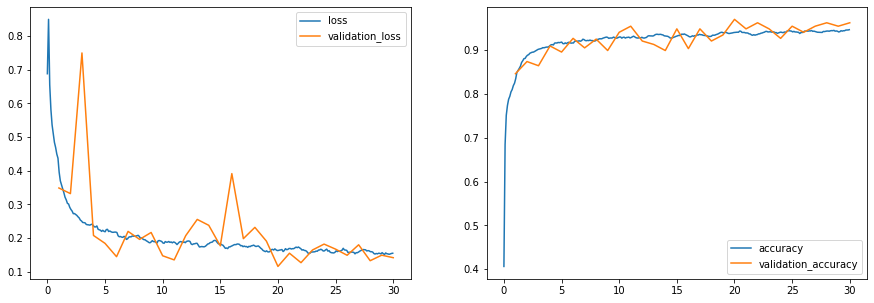

In [7]:
training = TrainingHelper(net, nn.BCELoss(), optim.Adam(net.parameters(), lr=0.001))
training.reporter = PlotReporter(figsize=(15,5))

n_gen = 30
training.fit(n_gen,train_loader,valid_loader)

In [8]:
# calculate mean accuracy and loss of the last n validation epochs
n = 10
print("Acc: ", np.mean(training.reporter.val_acc[-n:]))
print("Loss:", np.mean(training.reporter.val_loss[-n:]))

Acc:  0.9518229166666666
Loss: 0.1551158182322979
